# Make global data available as pandas data frame

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

In [36]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (8, 6)   # need bigger size otherwise xlabels are cut-off in svg files

In [37]:
import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')

def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#
def fetch_data(names = ['Confirmed', 'Deaths', 'Recovered']):
    """Return 4 data frames:
    [confirmed, deaths, recovered], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_19-covid-" + name + ".csv")
        df = pd.read_csv(url, index_col=1)

        location_info['Lat'] = df['Lat']
        location_info['Long'] = df['Long']
        location_info['Province/State'] = df['Province/State']
        location_info['location'] = df.index + "-" + df['Province/State']
        # df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns)
        # use those objects as new column labels
        df.columns = dates
        print(f"{name:10}: last data point from {max(dates)}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs



In [38]:
# (confirmed, deaths, recovered), location_infos = fetch_data()
confirmed, deaths, recovered = fetch_data()

Confirmed : last data point from Province/State
Deaths    : last data point from Province/State
Recovered : last data point from Province/State


In [39]:
deaths.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,7
Mainland China,Chongqing,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,3,3,4,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [40]:
deaths.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.149123,0.157895,0.228070,0.368421,0.491228,0.719298,1.149123,1.166667,1.500000,1.868421,2.271930,3.175439,3.736842,4.315789,4.947368,5.561404,6.307018,7.070175,7.947368,8.885965,9.763158,9.807018,12.026316,13.359649,14.614035,15.526316,16.385965,17.605263,18.614035,19.710526,19.745614,21.561404,21.657895,23.061404,23.754386,24.298246,24.684211,25.149123
std,1.592196,1.594121,2.250015,3.747006,4.870437,7.116612,11.704498,11.704259,15.168814,19.101737,23.315187,32.772816,38.766616,44.853412,51.407765,57.869557,65.452966,73.035659,81.552941,91.196836,99.997195,99.994148,122.651637,136.416795,149.432585,158.794697,167.502662,179.861777,189.971051,200.733157,200.730031,219.644082,219.636539,233.584128,239.946954,244.811755,247.240999,251.081281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,249.000000,350.000000,414.000000,479.000000,549.000000,618.000000,699.000000,780.000000,871.000000,974.000000,1068.000000,1068.000000,1310.000000,1457.000000,1596.000000,1696.000000,1789.000000,1921.000000,2029.000000,2144.000000,2144.000000,2346.000000,2346.000000,2495.000000,2563.000000,2615.000000,2641.000000,2682.000000


Available countries:

In [41]:
pd.set_option('display.max_rows', 200)
deaths

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,7
Mainland China,Chongqing,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,3,3,4,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Mainland China,Guangdong,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,4,4,5,5,5,5,6,6,7,7,7,7
Mainland China,Guangxi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Mainland China,Guizhou,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2
Mainland China,Hainan,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5


# Pick one country

In [42]:
country = "Germany"
#country = "UK"
#country = "Italy"

In [43]:
# create one DataFrame for country/region
c_df = pd.DataFrame()
c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
c_df['recovered'] = recovered.loc[country].drop('Province/State')
c_df['deaths'] = deaths.loc[country].drop('Province/State')
# Compute those who are infected and have not recovered or died yet
c_df['acute'] = c_df['confirmed'] - c_df['recovered'] - c_df['deaths']
c_df.index = string_to_date(c_df.index)

In [44]:
c_df.country = country  # remember which country we work on, just in case
c_df.tail()

,confirmed,recovered,deaths,acute
2020-02-24,16,14,0,2
2020-02-25,17,14,0,3
2020-02-26,27,15,0,12
2020-02-27,46,16,0,30
2020-02-28,48,16,0,32


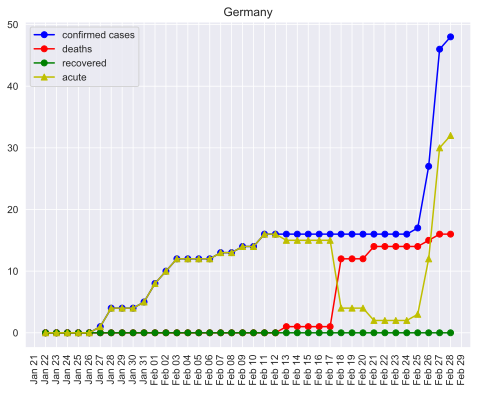

In [45]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c_df.index, c_df['confirmed'], 'o-b')
ax.plot(c_df.index, c_df['recovered'], 'o-r')
ax.plot(c_df.index, c_df['deaths'], 'o-g')
ax.plot(c_df.index, c_df['acute'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'acute'])
ax.set_title(country);

# Compute some derived entities

In [46]:
# Compute day-to-day increases
c_df['new_confirmed'] = c_df['confirmed'].diff()
c_df['new_recovered'] = c_df['recovered'].diff()
c_df['new_deaths'] = c_df['deaths'].diff()
c_df['new_acute'] = c_df['acute'].diff()

In [47]:
c_df

,confirmed,recovered,deaths,acute,new_confirmed,new_recovered,new_deaths,new_acute
2020-01-22,0,0,0,0,NaN,NaN,NaN,NaN
2020-01-23,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0
2020-01-27,1,0,0,1,1,0,0,1
2020-01-28,4,0,0,4,3,0,0,3
2020-01-29,4,0,0,4,0,0,0,0
2020-01-30,4,0,0,4,0,0,0,0
2020-01-31,5,0,0,5,1,0,0,1


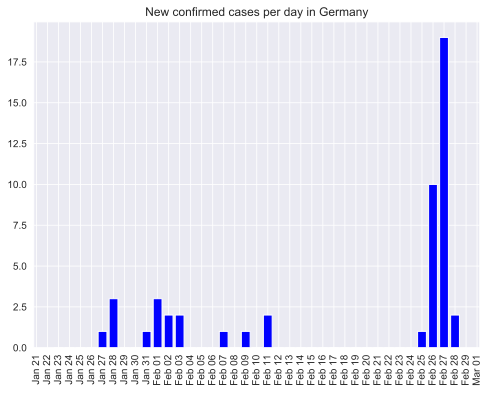

In [48]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_confirmed'], color='b')
set_date_formatting(ax)
ax.set_title(f"New confirmed cases per day in {c_df.country}")
fig.savefig(f'figures/new-deaths-{c_df.country}.svg')

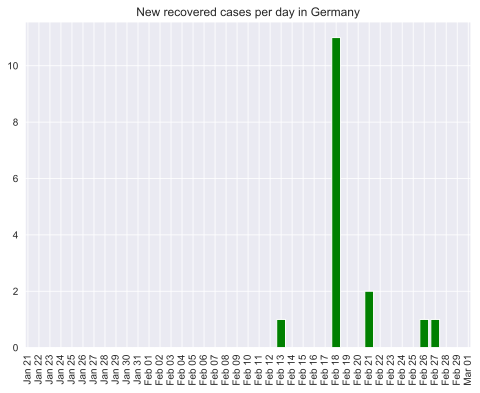

In [49]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_recovered'], color='g')
set_date_formatting(ax)
ax.set_title(f"New recovered cases per day in {c_df.country}")
fig.savefig(f'figures/new-recovered-{c_df.country}.svg')

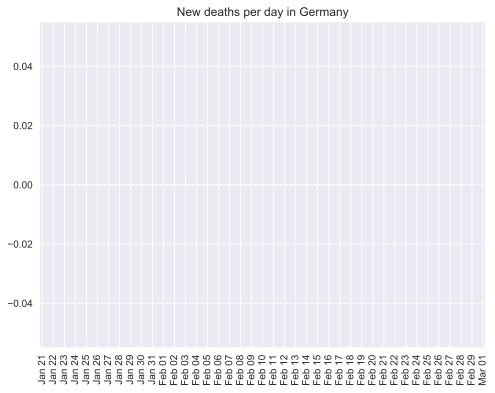

In [50]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_deaths'], color='r')
set_date_formatting(ax)
ax.set_title(f"New deaths per day in {c_df.country}")
fig.savefig(f'figures/new-deaths-{c_df.country}.svg')

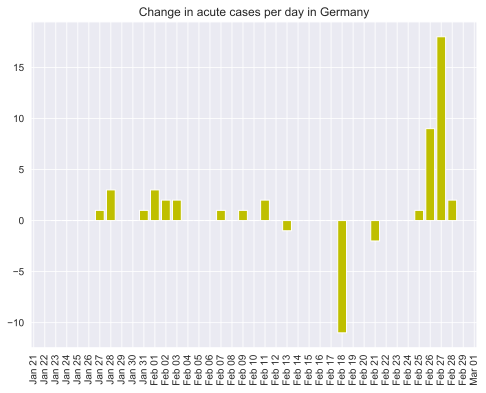

In [51]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_acute'], color='y')
set_date_formatting(ax)
ax.set_title(f"Change in acute cases per day in {c_df.country}")
fig.savefig(f'figures/new-acute-{c_df.country}.svg')

# Look at some world wide data

In [52]:
# global data
glob = pd.DataFrame()
glob['deaths'] = deaths.sum(axis=0)
glob['confirmed'] = confirmed.sum(axis=0)
glob['recovered'] = recovered.sum(axis=0)
glob['acute'] = glob['confirmed'] - glob['deaths'] - glob['recovered']
glob.index = string_to_date(glob.index)

In [53]:
pd.set_option('display.max_columns', 200)
glob

,deaths,confirmed,recovered,acute
2020-01-22,17,555,28,510
2020-01-23,18,653,30,605
2020-01-24,26,941,36,879
2020-01-25,42,1434,39,1353
2020-01-26,56,2118,52,2010
2020-01-27,82,2927,61,2784
2020-01-28,131,5578,107,5340
2020-01-29,133,6166,126,5907
2020-01-30,171,8234,143,7920
2020-01-31,213,9927,222,9492


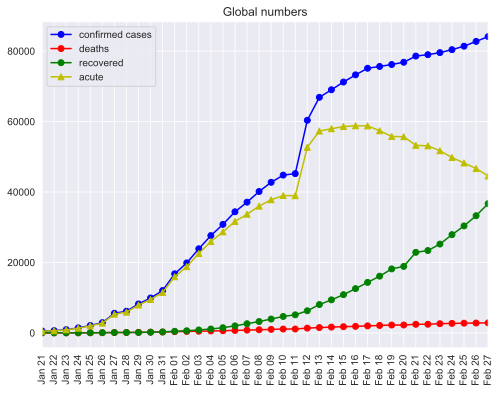

In [54]:
fig, ax = plt.subplots(figsize=figsize)
glob['confirmed'].plot(kind='line', style='o-b', ax=ax)
glob['deaths'].plot(kind='line', style='o-r', ax=ax)
glob['recovered'].plot(kind='line', style='o-g', ax=ax)
glob['acute'].plot(kind='line', style='^-y', ax=ax)
set_date_formatting(ax)
ax.legend(['confirmed cases', 'deaths', 'recovered', 'acute'])
ax.set_title("Global numbers");
fig.savefig('figures/global-overviews.svg')

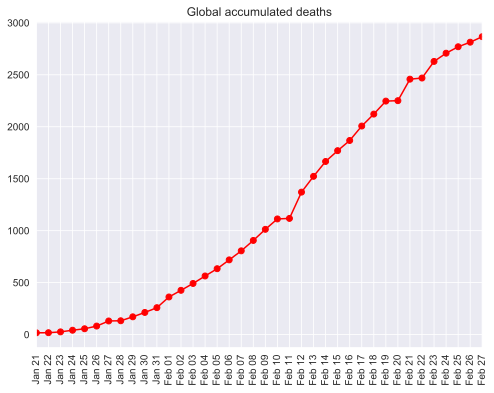

In [55]:
fig, ax = plt.subplots(figsize=figsize)
glob['deaths'].plot(kind='line', style='o-r', ax=ax)
set_date_formatting(ax)
ax.set_title("Global accumulated deaths");

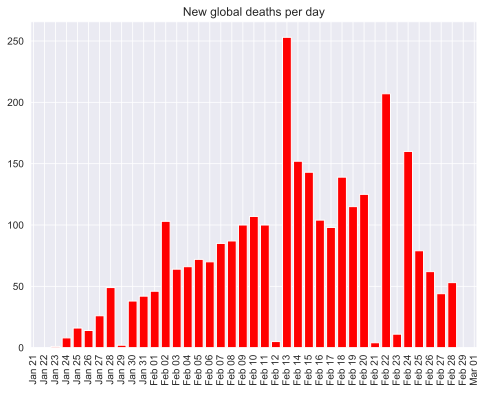

In [58]:
glob['new-deaths'] = glob['deaths'].diff()
glob['new-confirmed'] = glob['confirmed'].diff()

fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-deaths'], color='r' )
set_date_formatting(ax)
ax.set_title("New global deaths per day")
fig.savefig('figures/new-deaths.svg');

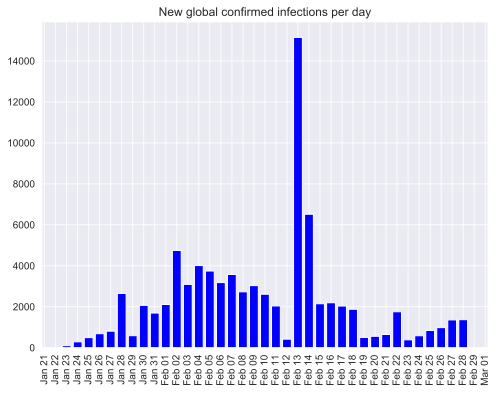

In [59]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-confirmed'], color='b')
set_date_formatting(ax)
ax.set_title("New global confirmed infections per day");
fig.savefig('figures/new-infections.svg');